In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Models/Titanic Survival Prediction /train.csv')

In [3]:
titanic_data.head()
# pclass --> ticket class
# sibsp --> siblings,spouses aboard the titanic
# parch --> parents,children aboard the titanic
# cabin --> Cabin No.
# embarked --> port of embarkation (C = Cherbourg , Q = Queenstown , S = Southampton)
# 0 --> Didn't Survive
# 1 --> Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum() # This data contains missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Handling the missing values
# Dropping cabin column from data frame as its of no use and contains most missing values
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
# Replacing all the missing values of age with mean of age of other passengers
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True) # fillna functions fills all where there is no value

<ipython-input-8-6f900d6dd036>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True) # fillna functions fills all where there is no value


In [9]:
# Replacing missing values in Embarked column with most common values in that Embarked column
print(titanic_data['Embarked'].mode()) # mode value is nothing but the value that is repeated most no of times

0    S
Name: Embarked, dtype: object


In [10]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

<ipython-input-10-bc2b444396f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [11]:
# Checking again for any missing values
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Getting Statistical mesaures
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [14]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [15]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


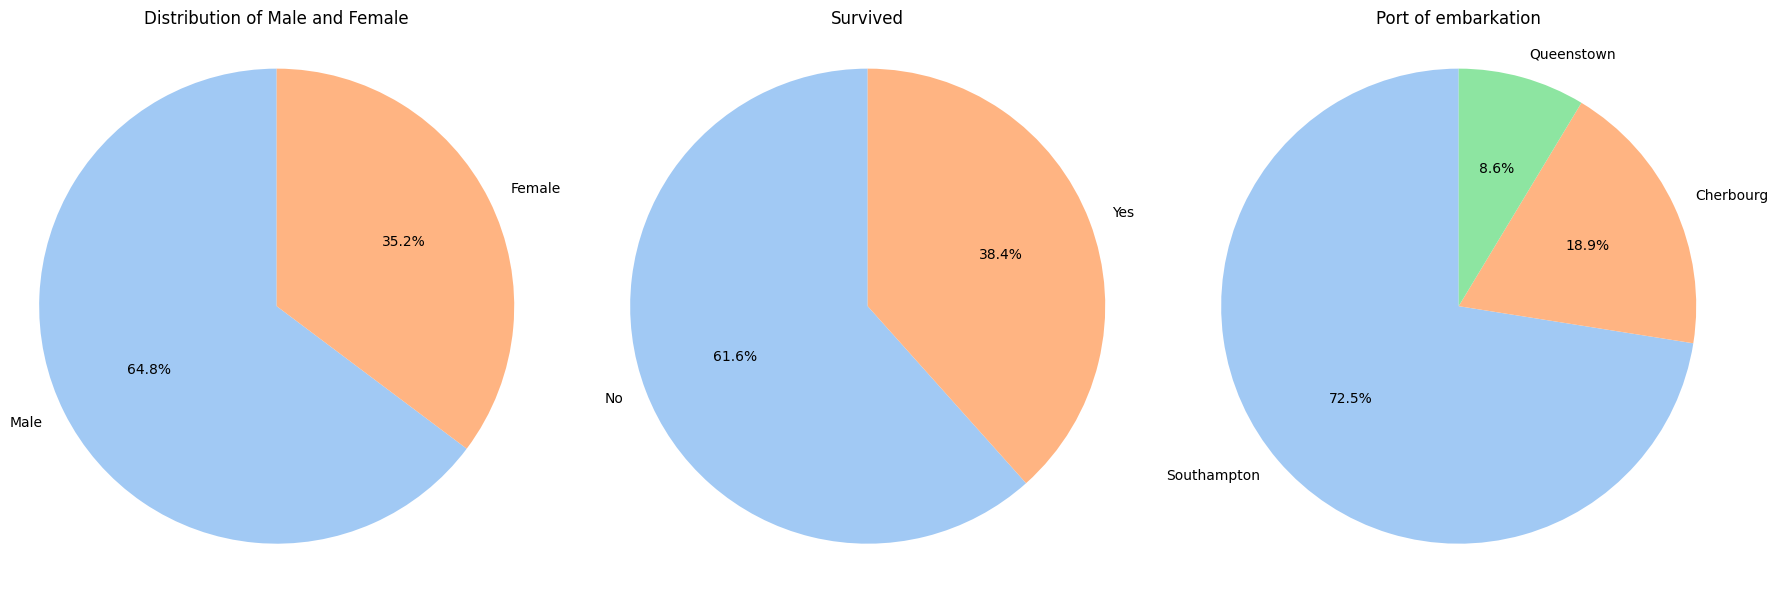

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Sex
Sex_counts = titanic_data['Sex'].value_counts()
axes[0].pie(Sex_counts, labels=['Male', 'Female'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Distribution of Male and Female')

# Pie chart for No. of people that Survived/Not Survived
Survived_counts = titanic_data['Survived'].value_counts()
axes[1].pie(Survived_counts, labels=['No', 'Yes'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].axis('equal')
axes[1].set_title('Survived')

# Pie chart for Embarked
region_counts = titanic_data['Embarked'].value_counts()
axes[2].pie(region_counts, labels=['Southampton', 'Cherbourg','Queenstown'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[2].axis('equal')
axes[2].set_title('Port of embarkation')

# Show the pie charts
plt.tight_layout()
plt.show()

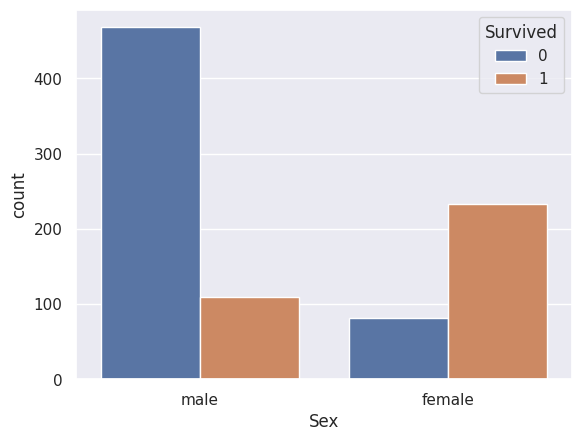

In [17]:
# Checking how many male and female survied out of total
sns.set()
sns.countplot(x='Sex', hue='Survived', data=titanic_data) # x axis is gender y axis is count and this is based on people who survived or not
plt.show()
# Even though we have more males , more females survived the titanic incident as they were given priority

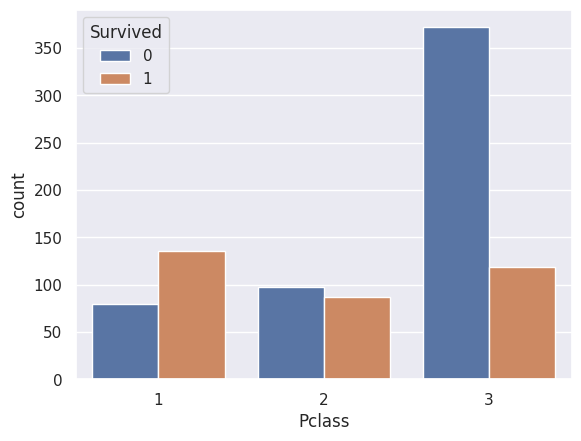

In [18]:
# Checking for Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.show()
# This shows that first class people in the titanic incident were given more priority over other classes

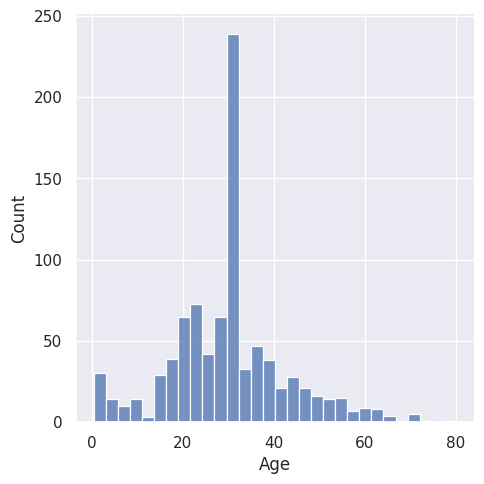

In [19]:
# Checking for Age column

sns.displot(titanic_data['Age'])
plt.show()

In [20]:
# Encoding categorical data into numeric data so machine can understand better
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-20-3f126bb3b960>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


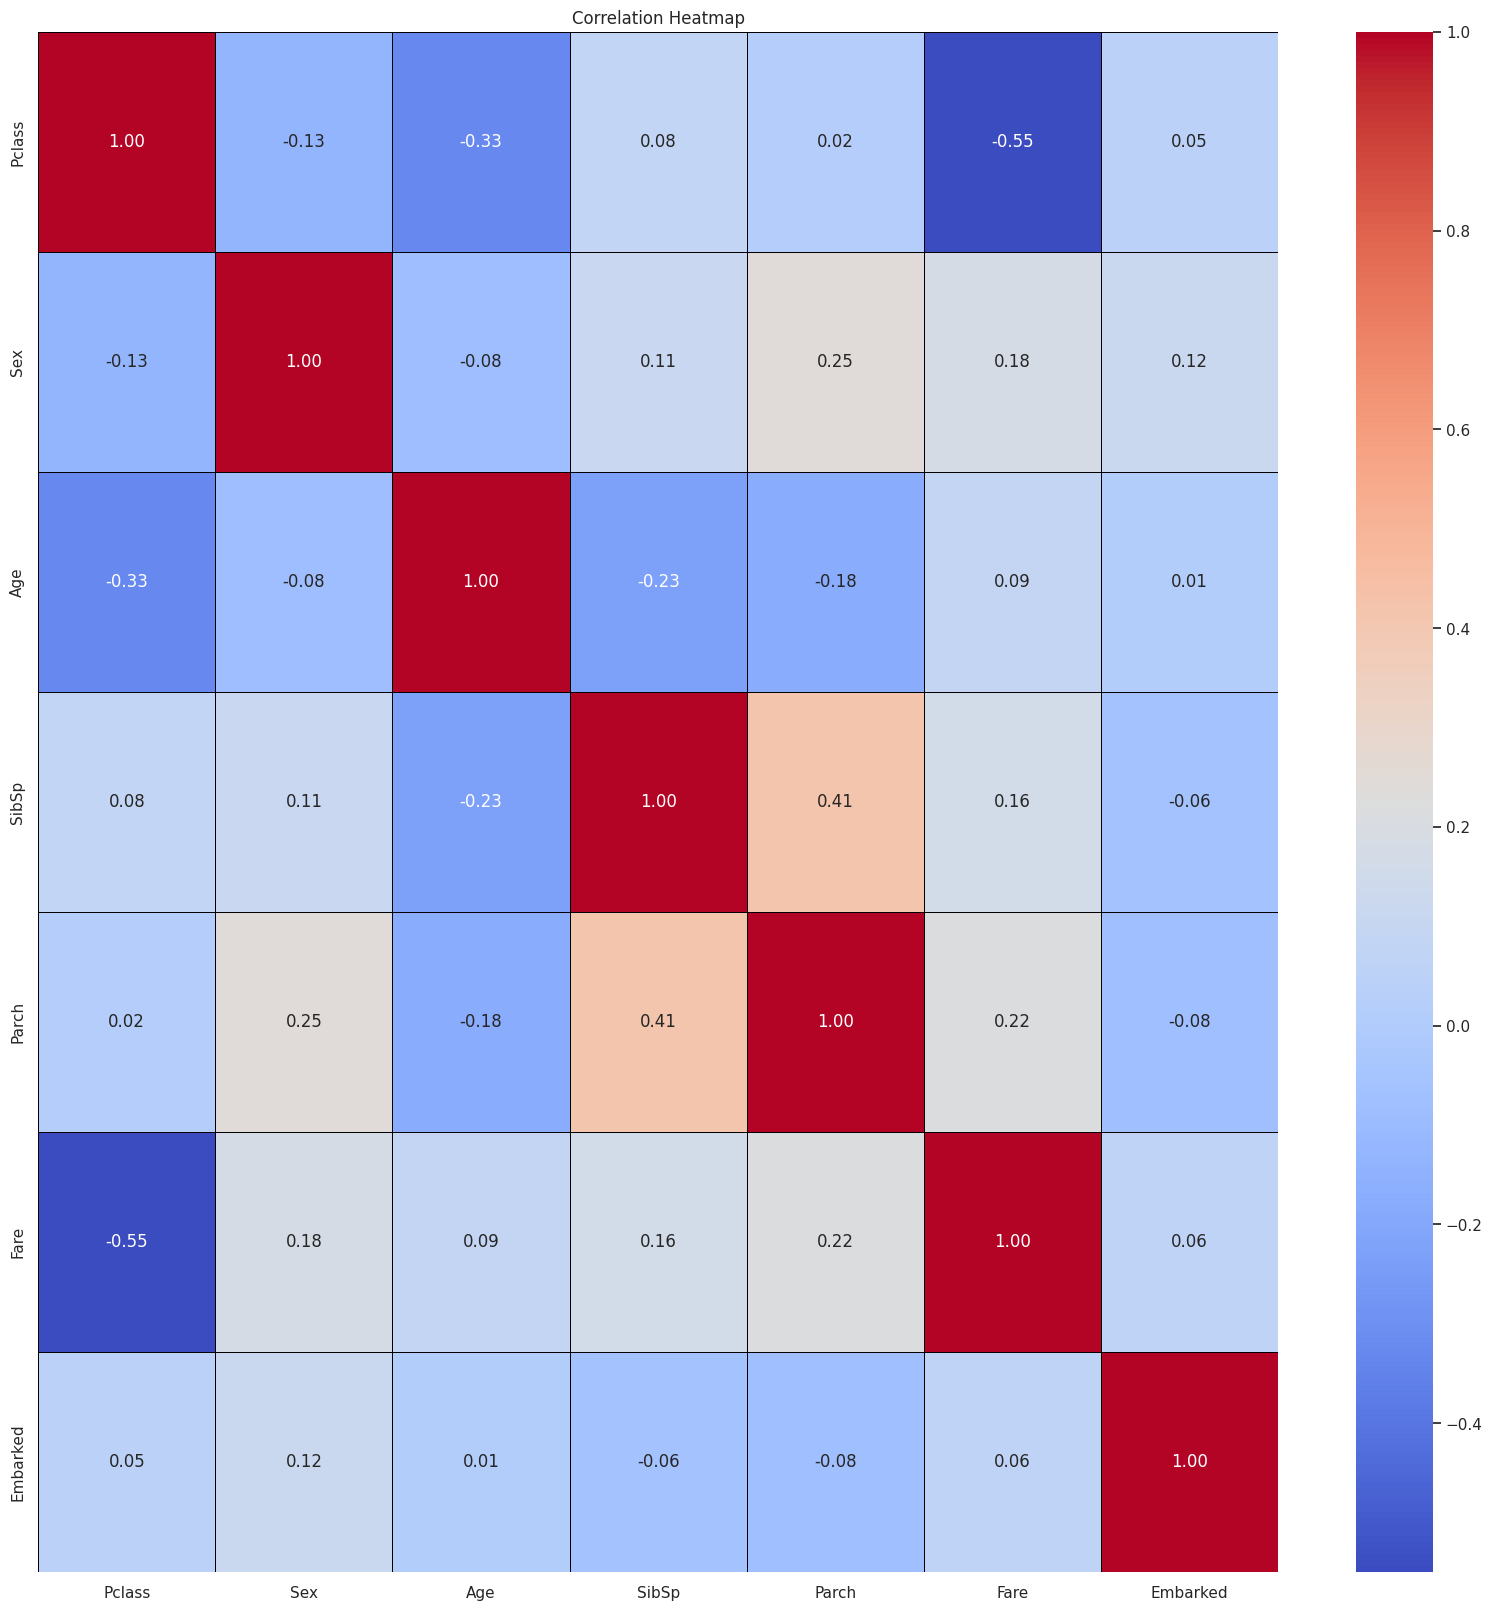

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1).corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Removing unnecessary columns and splitting data into features and output category
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [25]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [26]:
# Splitting dataset into training and testing
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# predicting accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [37]:
# predicting accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [39]:
# Making a predictive system
input_data = (3,0,35,0,0,8.05,0) # Pclass , sex , age , sibsp , parch , fare , embarked

# Changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
if(prediction[0]==0):
  print('The person did not survive')
else:
  print('The person survived')

The person did not survive
